<a href="https://colab.research.google.com/github/pauljune5052-CET/ADALL_github/blob/main/7075157p__ADALL_Practical_Test_Vehicle_Sales_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADALL Practical Test – Regression (Vehicle Sales)

**Dataset:** `syedanwarafridi/vehicle-sales-data` → `car_prices.csv`  
**Goal:** Build a regression model to predict **selling price** using basic vehicle attributes.

## Guide for this practical test
- Focus on a **clear workflow**
- Keep code **readable** and **stable**.
- Answer short questions in **markdown** cells.
- You may run cells step-by-step and check outputs.

##Data Dictionary

sellingprice:
The price at which the vehicle was sold.

year: The manufacturing year of the vehicle.

make:
The brand or manufacturer of the vehicle.

model:
The specific model of the vehicle.

body:
The body type of the vehicle (e.g., SUV, Sedan).

transmission:
The type of transmission in the vehicle (e.g., automatic).

odometer:
The mileage or distance traveled by the vehicle.

condition:
Condition of the vehicle, rated on a scale.



## Section 0) Setup

This notebook uses **kagglehub** to download the dataset directly into Colab.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Section 1) Download and load the dataset.
###Run the following code exactly as shown for Section 1. Do not edit it, or your results and answers may differ from the expected output.

In [2]:
import kagglehub
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")
print("Downloaded to:", path)
print("Files:", os.listdir(path))
csv_path = os.path.join(path, "car_prices.csv")
df = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'vehicle-sales-data' dataset.
Downloaded to: /kaggle/input/vehicle-sales-data
Files: ['car_prices.csv']


In [3]:
target_col = "sellingprice"
feature_cols = [
    "year",
    "make",
    "model",
    "body",
    "transmission",
    "odometer",
    "condition",
]
df = df[feature_cols + [target_col]].copy()
df = df.dropna()
df = df.sample(5000, random_state=42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 158048 to 378287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   make          5000 non-null   object 
 2   model         5000 non-null   object 
 3   body          5000 non-null   object 
 4   transmission  5000 non-null   object 
 5   odometer      5000 non-null   float64
 6   condition     5000 non-null   float64
 7   sellingprice  5000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 351.6+ KB


In [5]:
data_preview = df.head(10).to_string()
print(data_preview)

        year        make            model         body transmission  odometer  condition  sellingprice
158048  2013  Mitsubishi  Outlander Sport          SUV       manual   19475.0       49.0       12000.0
195178  2008     Hyundai          Tiburon    Hatchback    automatic   77583.0       22.0        2000.0
85388   2013    Chrysler              200        Sedan    automatic   32998.0       35.0       10500.0
333139  2011        Ford           Escape          SUV    automatic   86281.0       37.0        8700.0
338466  2014   Chevrolet            Cruze        Sedan    automatic   20124.0        3.0       13400.0
499040  2011   Chevrolet           Malibu        sedan    automatic   59444.0       44.0       10000.0
362067  2014      Toyota            Camry        sedan    automatic   32052.0       28.0       14900.0
46685   2006   Chevrolet      Monte Carlo        Coupe    automatic  168569.0        2.0        1250.0
232332  2005  Volkswagen       New Beetle  Convertible    automatic   854

##Section 2) Inspection + AI-assisted cleaning

**Important Note**
- You are free to modify the given code in this section, including the following block, such as adding additional queries, as you deem necessary.
- You do not need to submit this block of modified code, if applicable.



In [6]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# outlier summary
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)

=== DTYPES ===
year              int64
make             object
model            object
body             object
transmission     object
odometer        float64
condition       float64
sellingprice    float64

=== NUMERIC DESCRIBE ===
              year       odometer   condition   sellingprice
count  5000.000000    5000.000000  5000.00000    5000.000000
mean   2010.236800   67335.086600    30.78680   13773.646000
std       3.742129   51236.131912    13.28692    9522.803444
min    1991.000000       1.000000     1.00000     200.000000
25%    2008.000000   28759.500000    24.00000    7200.000000
50%    2012.000000   52177.000000    34.50000   12300.000000
75%    2013.000000   96431.000000    41.00000   18300.000000
max    2015.000000  380347.000000    49.00000  111000.000000

=== CATEGORICAL DESCRIBE ===
        make   model   body transmission
count   5000    5000   5000         5000
unique    43     449     48            2
top     Ford  Altima  Sedan    automatic
freq     850     173   1

In [7]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

##Task for question 1 and 2

1. Create a request using the OpenAI API client.
2. Use client.responses.create with appropriate instructions and input to request the necessary steps and code for data cleaning, without encoding first.
3. Copy your request code to Politemall Q1
4. Copy GenAI recommended code to 2 blocks below. You are required to review and modify if necessary.
4. Copy your modified GenAI response and add your written review for each recommendations returned by the model to Politemall Q2

In [8]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)


Below I (A) list the data-quality issues to address before modelling (priority order) with justification strictly based on the dataset profile you provided, (B) list columns that look redundant / correlated / potentially leaking and why (again justified from the profile), and (C) provide a Python cleaning script: one helper function per issue plus a wrapper that calls them based on user True/False choices, and a single-line example call. Per your instruction I do not encode categorical columns or train a model.

A — Priority list of data-quality issues to resolve (highest -> lowest), with justification drawn only from the dataset profile

1) Fix/inspect "condition" values (highest priority)
- Evidence: condition: count 5000, mean = 30.7868, std = 13.2869, min = 1, max = 49, and IQR outlier count = 0.
- Why: Typical vehicle condition scales are usually small integers (e.g., 1–5 or 1–10). Here the mean (~30.8) and max (49) are inconsistent with those expectations and indicate a likely en

In [9]:
#---------------------------
# Block for running the script recommended by model. Modify as you deem necessary.
# You do not need to copy and paste this block into Politemall.
#---------------------------

import pandas as pd
import numpy as np

# Helper 1: remove duplicate rows
def remove_duplicates(df):
    """
    Remove exact duplicate rows.
    Based on profile: duplicate rows = 0, but keep as a safety step.
    """
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    print(f"remove_duplicates: dropped {before - after} duplicate rows")
    return df

# Helper 2: detect and handle outliers using IQR method for selected columns
def treat_outliers_iqr(df, cols=('year', 'odometer', 'sellingprice'), method='cap'):
    """
    Identifies outliers per column using IQR method.
    method: 'cap' => winsorize (cap) values to [lower_bound, upper_bound]
            'remove' => drop rows with outliers in any of the cols
    Uses IQR (1.5*IQR) consistent with the outlier counts reported in the profile.
    """
    df = df.copy()
    outlier_mask = pd.Series(False, index=df.index)
    caps = {}
    for c in cols:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        # Count outliers (for reporting)
        mask = (df[c] < lower) | (df[c] > upper)
        outliers_count = mask.sum()
        print(f"treat_outliers_iqr: column '{c}' -> IQR lower={lower:.3f}, upper={upper:.3f}, outliers={outliers_count}")
        outlier_mask = outlier_mask | mask
        caps[c] = (lower, upper)

    if method == 'remove':
        before = len(df)
        df = df.loc[~outlier_mask].reset_index(drop=True)
        after = len(df)
        print(f"treat_outliers_iqr: removed {before - after} rows containing outliers in {cols}")
        return df
    elif method == 'cap':
        # Apply capping per column
        for c in cols:
            lower, upper = caps[c]
            # Replace values below lower with lower; above upper with upper
            df[c] = np.where(df[c] < lower, lower, df[c])
            df[c] = np.where(df[c] > upper, upper, df[c])
        print(f"treat_outliers_iqr: capped outliers to IQR bounds for columns {cols}")
        return df
    else:
        raise ValueError("method must be 'cap' or 'remove'")

# Helper 3: validate and impute implausible numeric values (non-positive etc.)
def impute_invalid_values(df, strategy='median'):
    """
    Detect obvious invalid numeric values and impute.
    Rules used (based only on dataset profile logic):
      - odometer <= 0 -> set NaN then impute
      - sellingprice <= 0 -> set NaN then impute
      - condition <= 0 -> set NaN then impute
    Imputation strategies: 'median' (default) or 'mean'.
    """
    df = df.copy()
    numeric_cols = ['odometer', 'sellingprice', 'condition']
    replaced = {}
    for c in numeric_cols:
        invalid_mask = df[c] <= 0
        n_invalid = invalid_mask.sum()
        if n_invalid > 0:
            df.loc[invalid_mask, c] = np.nan
            replaced[c] = n_invalid
    if replaced:
        print(f"impute_invalid_values: set to NaN for non-positive values: {replaced}")
        for c in numeric_cols:
            if df[c].isna().any():
                if strategy == 'median':
                    val = df[c].median()
                else:
                    val = df[c].mean()
                df[c] = df[c].fillna(val)
                print(f"impute_invalid_values: imputed column '{c}' with {strategy}={val}")
    else:
        print("impute_invalid_values: no non-positive values detected for odometer/sellingprice/condition")
    return df

# Helper 4: check redundancy between model and make and optionally drop one
def check_redundant_make_model(df, action='flag'):
    """
    Checks model -> make mapping.
    If every model maps to exactly one make, model fully determines make (redundancy).
    action:
      - 'flag' : print summary and return df unchanged
      - 'drop_make' : drop 'make' column if safe
      - 'drop_model' : drop 'model' column (not recommended by default)
    """
    mapping_counts = df.groupby('model')['make'].nunique()
    models_multi_make = (mapping_counts > 1).sum()
    models_total = len(mapping_counts)
    print(f"check_redundant_make_model: {models_total} unique models, {models_multi_make} models map to >1 makes")
    if action == 'flag':
        if models_multi_make == 0:
            print("check_redundant_make_model: each model maps to exactly one make -> 'make' is redundant with 'model' (can drop make if desired).")
        else:
            print("check_redundant_make_model: some models map to multiple makes; dropping either column risks losing information. Consider encoding strategies.")
        return df
    elif action == 'drop_make':
        if models_multi_make == 0:
            df2 = df.drop(columns=['make'])
            print("check_redundant_make_model: dropped 'make' because each model uniquely maps to a make.")
            return df2
        else:
            raise ValueError("Cannot safely drop 'make' because some models map to multiple makes.")
    elif action == 'drop_model':
        df2 = df.drop(columns=['model'])
        print("check_redundant_make_model: dropped 'model' per user request (note: this removes high-cardinality feature).")
        return df2
    else:
        raise ValueError("action must be one of 'flag', 'drop_make', 'drop_model'")

# Helper 5: handle transmission imbalance (flag or combine rare categories)
def handle_transmission_imbalance(df, threshold=0.95, action='flag'):
    """
    Reports imbalance in 'transmission'. If top category frequency >= threshold -> optionally combine rare categories to 'other'.
    Based on profile: automatic freq ~4836/5000 ≈ 0.967 -> heavy imbalance.
    action:
      - 'flag': just report
      - 'combine': replace all categories with frequency < (1 - threshold) with 'other' (i.e., keep only dominant category and 'other')
    """
    df = df.copy()
    freq = df['transmission'].value_counts(normalize=True)
    top_cat = freq.index[0]
    top_freq = freq.iloc[0]
    print(f"handle_transmission_imbalance: top transmission='{top_cat}' freq={top_freq:.4f}")
    if action == 'flag':
        if top_freq >= threshold:
            print(f"handle_transmission_imbalance: imbalance detected (top category >= {threshold}). Consider combining rare categories or treating as near-constant.")
        else:
            print("handle_transmission_imbalance: no extreme imbalance detected based on threshold.")
        return df
    elif action == 'combine':
        # find categories with relative frequency below (1 - threshold) and combine
        to_keep = top_cat
        df['transmission'] = np.where(df['transmission'] == to_keep, to_keep, 'other')
        print(f"handle_transmission_imbalance: combined non-{to_keep} categories into 'other'")
        return df
    else:
        raise ValueError("action must be 'flag' or 'combine'")

# Helper 6: check multicollinearity (correlation) between numeric columns and optionally drop one
def check_multicollinearity(df, cols=('year', 'odometer'), thresh=0.7, action='flag'):
    """
    Computes Pearson correlation between cols and reports if absolute correlation > thresh.
    action:
      - 'flag' : print correlation and recommendation
      - 'drop_first' : if abs(corr) > thresh, drop the first column in cols
    """
    df = df.copy()
    sub = df.loc[:, cols].dropna()
    corr = sub.corr().iloc[0, 1]
    print(f"check_multicollinearity: Pearson correlation between {cols[0]} and {cols[1]} = {corr:.3f}")
    if action == 'flag':
        if abs(corr) >= thresh:
            print(f"check_multicollinearity: abs(corr) >= {thresh}. Consider dropping or combining these features.")
        else:
            print("check_multicollinearity: correlation below threshold; no automatic action recommended.")
        return df
    elif action == 'drop_first':
        if abs(corr) >= thresh:
            dropped = cols[0]
            df2 = df.drop(columns=[dropped])
            print(f"check_multicollinearity: dropped column '{dropped}' because abs(corr) >= {thresh}")
            return df2
        else:
            print("check_multicollinearity: correlation below thresh; no column dropped.")
            return df
    else:
        raise ValueError("action must be 'flag' or 'drop_first'")

# Wrapper function that calls the helpers based on boolean flags / choices
def preprocess(
    df,
    remove_dups=True,
    outlier_handling=True,
    outlier_method='cap',             # 'cap' or 'remove'
    impute_invalid=True,
    make_model_action='flag',         # 'flag', 'drop_make', or 'drop_model'
    transmission_action='flag',       # 'flag' or 'combine'
    multicol_action='flag',           # 'flag' or 'drop_first'
    multicol_thresh=0.7
):
    """
    Run preprocessing steps on df according to the options.
    Returns cleaned DataFrame. Does NOT encode categorical variables.
    """
    df = df.copy()
    print("preprocess: starting")
    if remove_dups:
        df = remove_duplicates(df)
    if outlier_handling:
        df = treat_outliers_iqr(df, cols=('year', 'odometer', 'sellingprice'), method=outlier_method)
    if impute_invalid:
        df = impute_invalid_values(df, strategy='median')
    # check redundancy between make and model
    df = check_redundant_make_model(df, action=make_model_action)
    # handle transmission imbalance
    df = handle_transmission_imbalance(df, threshold=0.95, action=transmission_action)
    # check multicollinearity between year and odometer
    df = check_multicollinearity(df, cols=('year', 'odometer'), thresh=multicol_thresh, action=multicol_action)
    print("preprocess: done")
    return df




In [10]:
df_clean = preprocess(df)

preprocess: starting
remove_duplicates: dropped 0 duplicate rows
treat_outliers_iqr: column 'year' -> IQR lower=2000.500, upper=2020.500, outliers=92
treat_outliers_iqr: column 'odometer' -> IQR lower=-72747.750, upper=197938.250, outliers=102
treat_outliers_iqr: column 'sellingprice' -> IQR lower=-9450.000, upper=34950.000, outliers=141
treat_outliers_iqr: capped outliers to IQR bounds for columns ('year', 'odometer', 'sellingprice')
impute_invalid_values: no non-positive values detected for odometer/sellingprice/condition
check_redundant_make_model: 449 unique models, 0 models map to >1 makes
check_redundant_make_model: each model maps to exactly one make -> 'make' is redundant with 'model' (can drop make if desired).
handle_transmission_imbalance: top transmission='automatic' freq=0.9672
handle_transmission_imbalance: imbalance detected (top category >= 0.95). Consider combining rare categories or treating as near-constant.
check_multicollinearity: Pearson correlation between year a

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 158048 to 378287
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   float64
 1   make          5000 non-null   object 
 2   model         5000 non-null   object 
 3   body          5000 non-null   object 
 4   transmission  5000 non-null   object 
 5   odometer      5000 non-null   float64
 6   condition     5000 non-null   float64
 7   sellingprice  5000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 351.6+ KB


##Section 3) Inspection after cleaning

As this dataset uses **sellingprice** as the target column, the following blocks in this section are intended to support your success in the practical test. There is no question or task for you to complete in this section. You can run the codes as it is.

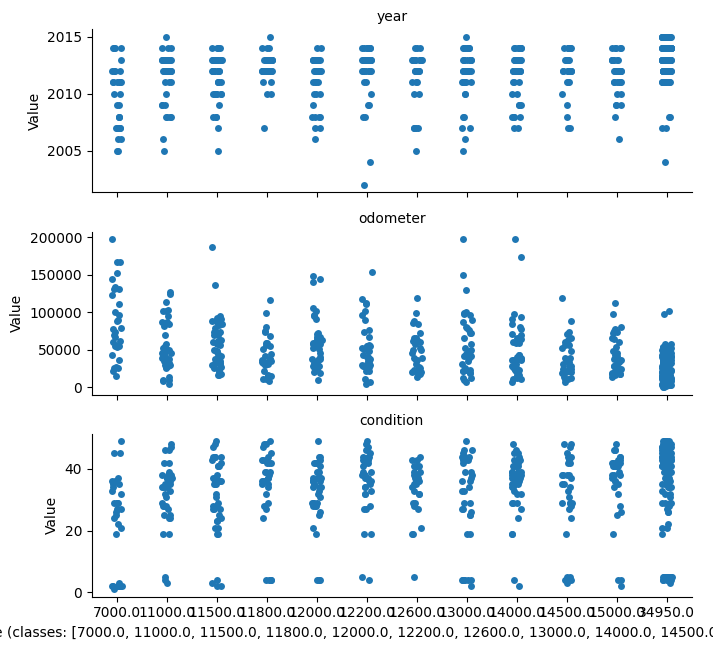

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_numeric_fast(
    df: pd.DataFrame,
    target_col: str,
    num_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",  # "auto" | "sorted" | "freq"
    dropna_target: bool = True
):
    """
    Fast jitter plot for numeric features vs a discrete target.

    x = target classes
    y = numeric feature values (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # If numeric-like (includes integer-coded), prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            # remove NaN if present
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            # If too many unique values, keep most frequent ones
            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            # For non-numeric target, default to most frequent classes
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order  # already by frequency
            else:
                # auto: if categories have natural order (pandas Categorical ordered), preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect numeric feature columns
    if num_cols is None:
        num_cols = d.select_dtypes(include="number").columns.tolist()
        num_cols = [c for c in num_cols if c != target_col]

    # Keep only existing columns
    num_cols = [c for c in num_cols if c in d.columns]

    if len(num_cols) == 0:
        raise ValueError("No numeric columns found to plot (after excluding target_col).")

    num_cols = num_cols[:max_features]

    # Long form for faceting
    long_df = d.melt(
        id_vars=[target_col],
        value_vars=num_cols,
        var_name="feature",
        value_name="value"
    ).dropna(subset=["value"])

    # Make target explicitly ordered categorical so seaborn respects the x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Value")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, num_cols


# Example:
order_used, num_cols_used = jitter_numeric_fast(df_clean, target_col="sellingprice", sample=15000)
# print("Order used:", order_used)
# print("Numeric columns plotted:", num_cols_used)


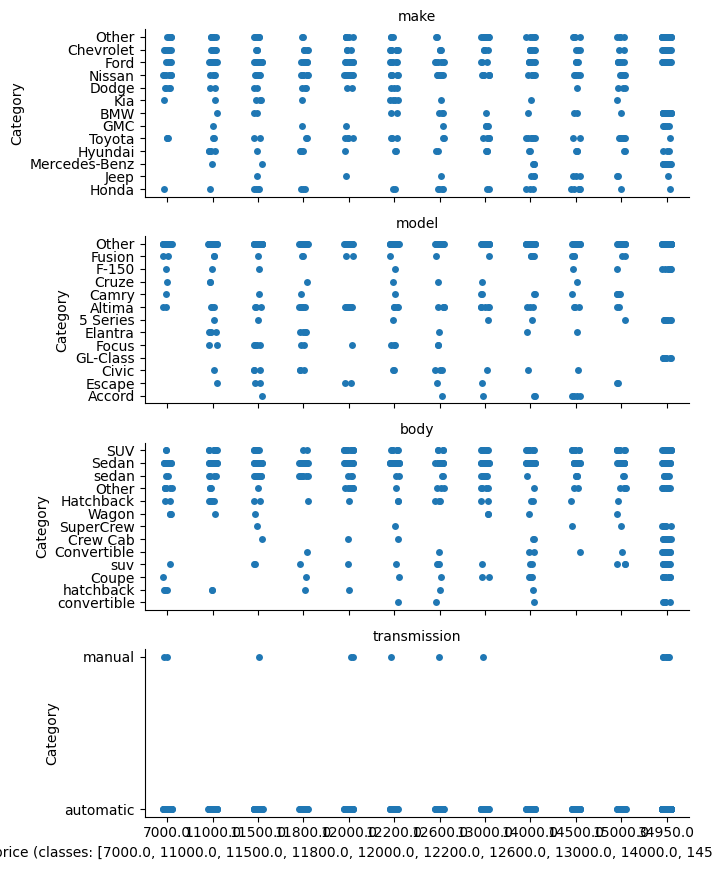

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_categorical_fast(
    df: pd.DataFrame,
    target_col: str,
    cat_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",      # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    top_k: int = 15,                # keep top categories per feature, rest -> "Other"
    dropna_feature: bool = False,   # if False, show missing as "(Missing)"
    missing_label: str = "(Missing)"
):
    """
    Fast jitter plot for categorical features vs a discrete target.

    x = target classes
    y = categorical feature levels (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')

    Notes:
    - For each categorical feature, rare categories are collapsed into "Other" (top_k kept).
    - Uses seaborn catplot (row facets), like jitter_numeric_fast.
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect class order if not provided
    if order is None:
        y = d[target_col]

        # Numeric-like targets: prefer sorted unique
        if pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y)
            uniq = [v for v in uniq if pd.notna(v)]
            order = sorted(uniq)

            if len(order) > max_classes:
                top = y.value_counts().head(max_classes).index.tolist()
                order = sorted(top)

        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()

            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                # auto: if pandas ordered categorical, preserve it
                if pd.api.types.is_categorical_dtype(y) and y.cat.ordered:
                    order = list(y.cat.categories)
                    if len(order) > max_classes:
                        order = vc.head(max_classes).index.tolist()

    # Filter df to those classes
    d = d[d[target_col].isin(order)].copy()

    # Sample for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect categorical feature columns
    if cat_cols is None:
        cat_cols = d.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
        cat_cols = [c for c in cat_cols if c != target_col]

    # Keep only existing columns
    cat_cols = [c for c in cat_cols if c in d.columns and c != target_col]

    if len(cat_cols) == 0:
        raise ValueError("No categorical columns found to plot (after excluding target_col).")

    cat_cols = cat_cols[:max_features]

    # Build long form with per-feature top_k collapsing
    frames = []
    for c in cat_cols:
        s = d[c]

        if dropna_feature:
            s = s.dropna()
            tmp = d.loc[s.index, [target_col]].copy()
            tmp[c] = s.astype("object")
        else:
            tmp = d[[target_col]].copy()
            tmp[c] = s.astype("object").fillna(missing_label)

        vc = tmp[c].value_counts(dropna=False)
        keep = vc.head(top_k).index
        tmp[c] = tmp[c].where(tmp[c].isin(keep), other="Other")

        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        frames.append(tmp[[target_col, "feature", "value"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Make target explicitly ordered categorical so seaborn respects x order
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Category")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, cat_cols


# Example:
order_used, cat_cols_used = jitter_categorical_fast(df_clean, target_col="sellingprice", sample=15000, top_k=12)
# print("Order used:", order_used)
# print("Categorical columns plotted:", cat_cols_used)


##Section 4) Train-test split

 There is no question or task for you to complete in this section. You can run the codes as it is.


In [14]:
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]
X.shape,y.shape

((5000, 7), (5000,))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (4000, 7)
Test shape : (1000, 7)


##Section 5) Encoding


##Task for question 3
###Meaningful Ranking Encoding

Perform AI-assisted ranking (Generative AI supported). Uses a Generative AI model to infer ordering based on semantic meaning or external knowledge. A structure has been provided for you below.

Complete and copy all the codes within this section to Politemall Q3.

In [16]:
numeric_features = X_train.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object"]).columns.tolist()

In [17]:
numeric_features

['year', 'odometer', 'condition']

In [18]:
categorical_features


['make', 'model', 'body', 'transmission']

In [19]:
# Collect categorical columns and their unique values as a single strin
cat_summary = []

for col in categorical_features:
    uniques = X_train[col].unique()
    cat_summary.append(f"{col}: {list(uniques)}")

cat_summary_text = "\n".join(cat_summary)
cat_summary_text

"make: ['Cadillac', 'Ford', 'Toyota', 'Infiniti', 'Jeep', 'Ram', 'Lexus', 'Kia', 'Chevrolet', 'Chrysler', 'Nissan', 'Mercedes-Benz', 'MINI', 'Volkswagen', 'Saturn', 'Scion', 'Audi', 'Pontiac', 'BMW', 'Dodge', 'Honda', 'Lincoln', 'Suzuki', 'Hyundai', 'GMC', 'Mitsubishi', 'Buick', 'Mazda', 'Saab', 'FIAT', 'Acura', 'HUMMER', 'Subaru', 'Volvo', 'Mercury', 'Porsche', 'Jaguar', 'Land Rover', 'Ferrari', 'Bentley', 'smart', 'Isuzu']\nmodel: ['DTS', 'Explorer', 'Camry', 'G Sedan', 'Compass', 'C/V Tradesman', 'RX 350', 'Sorento', 'Cruze', 'PT Cruiser', 'Maxima', 'Fusion', 'Altima', 'C-Class', 'Cooper', 'IS 250', 'Ranger', 'SL-Class', 'Jetta', 'ION', 'Taurus', '2500', 'Commander', 'xB', 'Sienna', 'A4', 'Vibe', 'CLS-Class', 'Tahoe', '3 Series', 'Escape', 'Optima', 'Edge', 'Ram Pickup 1500', 'Charger', '1500', 'LS 460', 'Town and Country', 'Flex', 'Accord', 'Odyssey', 'CT 200h', 'MKZ', '7 Series', 'Forenza', 'Corolla', 'Jetta SportWagen', 'SX4', 'Sonata', 'Dart', 'EX', 'Grand Caravan', 'F-150', 'Ac

In [20]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an AI with extensive knowledge of tree-based models, do not provide anything else besides what is requested.
""",
    input=f"""
Categorical columns name: unique names of values\n
{cat_summary_text}\n
Next: Output ONLY valid Python dictionaries with All car model Selling price,
One dictionary per column
""")

print(response.output_text)

{'Cadillac': None, 'Ford': None, 'Toyota': None, 'Infiniti': None, 'Jeep': None, 'Ram': None, 'Lexus': None, 'Kia': None, 'Chevrolet': None, 'Chrysler': None, 'Nissan': None, 'Mercedes-Benz': None, 'MINI': None, 'Volkswagen': None, 'Saturn': None, 'Scion': None, 'Audi': None, 'Pontiac': None, 'BMW': None, 'Dodge': None, 'Honda': None, 'Lincoln': None, 'Suzuki': None, 'Hyundai': None, 'GMC': None, 'Mitsubishi': None, 'Buick': None, 'Mazda': None, 'Saab': None, 'FIAT': None, 'Acura': None, 'HUMMER': None, 'Subaru': None, 'Volvo': None, 'Mercury': None, 'Porsche': None, 'Jaguar': None, 'Land Rover': None, 'Ferrari': None, 'Bentley': None, 'smart': None, 'Isuzu': None}

{'DTS': None, 'Explorer': None, 'Camry': None, 'G Sedan': None, 'Compass': None, 'C/V Tradesman': None, 'RX 350': None, 'Sorento': None, 'Cruze': None, 'PT Cruiser': None, 'Maxima': None, 'Fusion': None, 'Altima': None, 'C-Class': None, 'Cooper': None, 'IS 250': None, 'Ranger': None, 'SL-Class': None, 'Jetta': None, 'ION': 

In [21]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin


class PriceEncoder(BaseEstimator, TransformerMixin):
    """
    Encode categorical laptop attributes using externally provided
    price mappings (e.g. Brand, Model, CPU, GPU).

    - Safe for Pipeline and GridSearchCV
    - DataFrame-in, DataFrame-out
    - Numeric-only output
    """

    def __init__(self, column_maps, fallback="median"):
        """
        Parameters
        ----------
        column_maps : dict
            {column_name: {category: numeric_price}}
        fallback : 'median' or numeric
            Value used for unseen categories
        """
        self.column_maps = column_maps
        self.fallback = fallback

    def fit(self, X, y=None):
        # compute fallback values per column
        self.fallbacks_ = {}

        for col, mapping in self.column_maps.items():
            values = list(mapping.values())

            if self.fallback == "median":
                self.fallbacks_[col] = float(np.median(values))
            else:
                self.fallbacks_[col] = float(self.fallback)

        return self

    def transform(self, X):
        X = X.copy()

        for col, mapping in self.column_maps.items():
            if col not in X.columns:
                continue

            fb = self.fallbacks_[col]
            X[col] = X[col].map(mapping).fillna(fb)

        return X


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
categorical_transformer = OneHotEncoder(handle_unknown="ignore")
#categorical_transformer = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
#numeric_transformer = StandardScaler()


preprocessor = ColumnTransformer([
        ("cat", categorical_transformer, categorical_features)
    ],remainder='passthrough')


In [ ]:
#mapping

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

price_maps = {

}


#preprocessor = ColumnTransformer([
#        ("cat", PriceEncoder(column_maps=price_maps), categorical_features)
#    ],remainder='passthrough')

In [24]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['make', 'model', 'body', 'transmission'])])

##Section 6) Modelling

Use the following code if you were unable to create a manual encoder. If you were able to, you do not run the following code. For the models, you do not need to edit or tune the model.

```

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)
```

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# -------------------------------------------
# 1. Create pipelines for both models
# -------------------------------------------

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42))
])

# -------------------------------------------
# 2. Define parameter grids
# Keep them small for speed and simplicity
# -------------------------------------------

param_grid_rf = {
  "regressor__n_estimators": [250],
  'regressor__max_depth':[5],
  'regressor__criterion':['squared_error']
}

param_grid_xgb = {
    "regressor__n_estimators": [250],
  'regressor__max_depth':[6],
  'regressor__eval_metric':['rmse']
}

# -------------------------------------------
# 3. Create GridSearchCV objects
# -------------------------------------------

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=3
)

# -------------------------------------------
# 4. Fit both models
# (Students can run one at a time if needed)
# -------------------------------------------e

gs_rf.fit(X_train, y_train)
print("Random Forest grid search complete.")

gs_xgb.fit(X_train, y_train)
print("XGBoost grid search complete.")

# -------------------------------------------
# 5. Evaluate on test set
# -------------------------------------------

from sklearn.metrics import mean_absolute_error

rf_pred = gs_rf.best_estimator_.predict(X_test)
xgb_pred = gs_xgb.best_estimator_.predict(X_test)

print("\nMAE (Random Forest):", mean_absolute_error(y_test, rf_pred))
print("Best RF Params:", gs_rf.best_params_)

print("\nMAE (XGBoost):", mean_absolute_error(y_test, xgb_pred))
print("Best XGB Params:", gs_xgb.best_params_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Random Forest grid search complete.
Fitting 10 folds for each of 1 candidates, totalling 10 fits
XGBoost grid search complete.

MAE (Random Forest): 3695.8999994637243
Best RF Params: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 5, 'regressor__n_estimators': 250}

MAE (XGBoost): 1911.6499869651796
Best XGB Params: {'regressor__eval_metric': 'rmse', 'regressor__max_depth': 6, 'regressor__n_estimators': 250}


##Section 7) Quick diagnostic plot (sorted true vs predicted)

This plot helps you check whether the model follows the overall price pattern.
The same approach can also be applied consistently when reviewing other models during model selection.

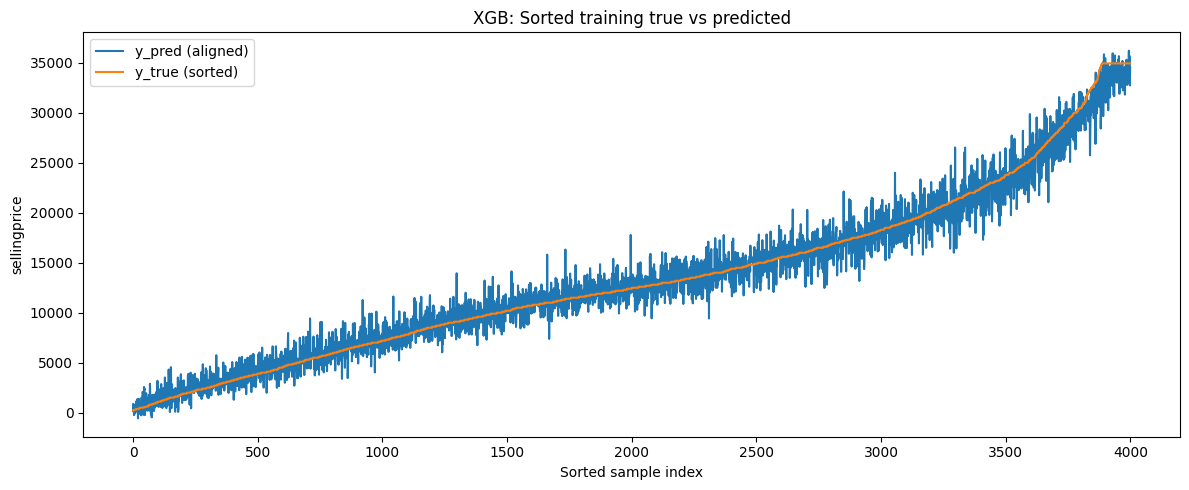

In [27]:
# Helper: plot y_true sorted, with y_pred aligned to same order
xgb_tpred = gs_xgb.best_estimator_.predict(X_train)
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.plot(y_true_sorted, label="y_true (sorted)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_train, xgb_tpred, "XGB: Sorted training true vs predicted")

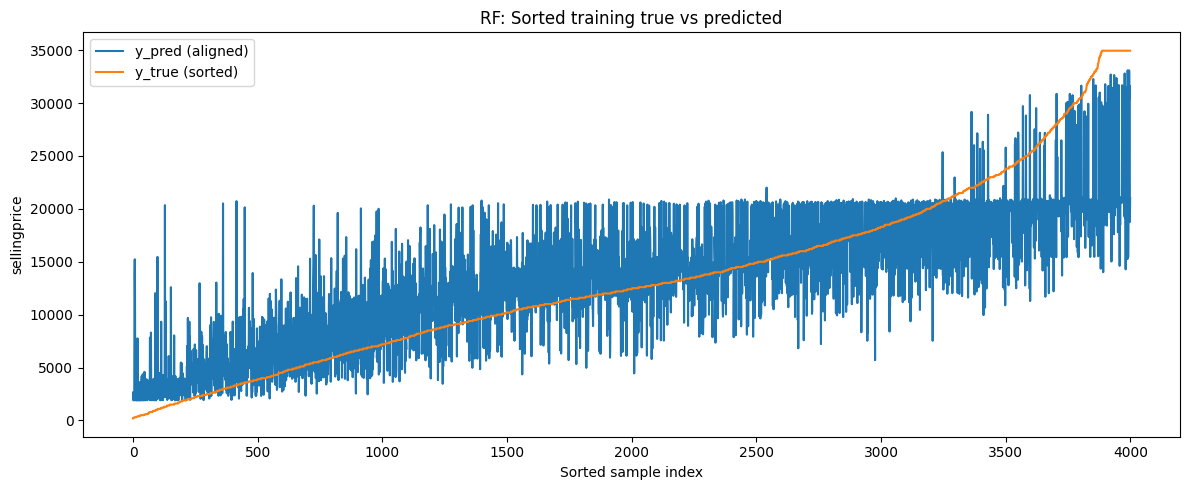

In [28]:
rf_tpred = gs_rf.best_estimator_.predict(X_train)
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.plot(y_true_sorted, label="y_true (sorted)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_train,rf_tpred , "RF: Sorted training true vs predicted")

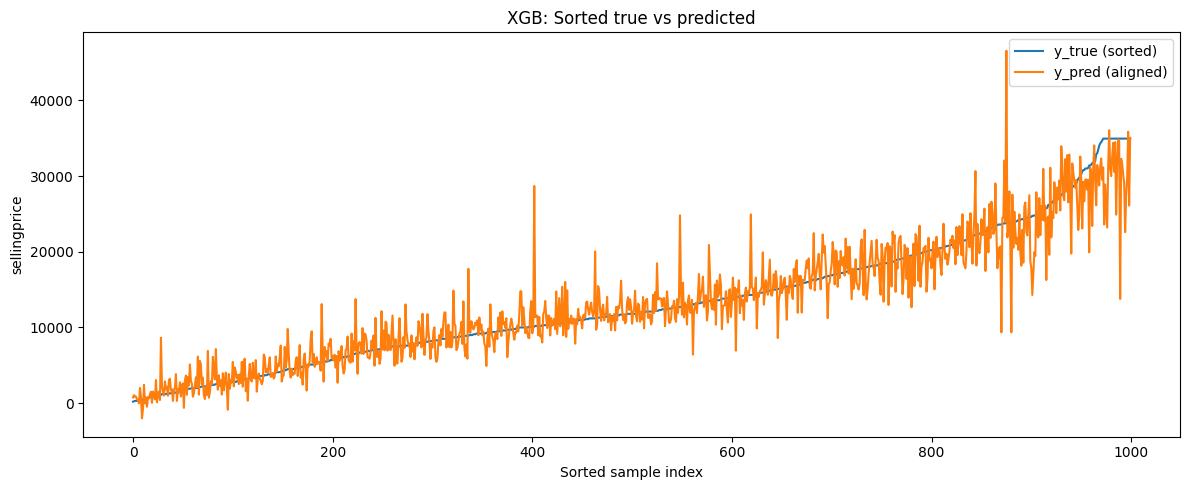

In [29]:
# Helper: plot y_true sorted, with y_pred aligned to same order
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_test, xgb_pred, "XGB: Sorted true vs predicted")

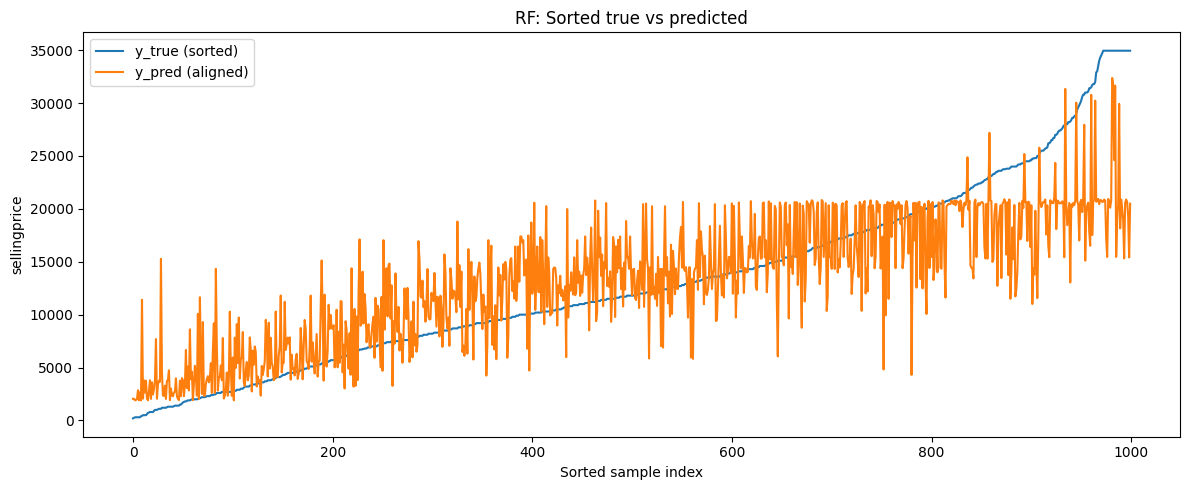

In [30]:
# Helper: plot y_true sorted, with y_pred aligned to same order
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="y_pred (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("sellingprice")
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_sorted_true_vs_pred(y_test, rf_pred, "RF: Sorted true vs predicted")

##Section 8) Model selection


##Task for question 4
### Model selection
See Politemall Q4, for more details. Save this as ipynb file and attach it to the same question.